Mexico City has an active volcano named "Popocatépetl", and the nearest city is only 12 km away from the crater!. Therefore it is extremely important to evaluate the risk for the people living nearby.



We know from classic mechanics that the equations that govern projectile motion with friction are:
$$\ddot{x} = - \frac{b}{m}\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x}$$
$$\ddot{y} = -g - \frac{b}{m}\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y}$$

Defining the friction constant that acts proportional to velocity as: 
$B \equiv bg/m$

we can break down the two second order differential equations into 4 first order differential equations:

* $\dot{x} = v_x$
* $\dot{v_x} = - B\sqrt{\dot{x}^2 + \dot{y}^2}\dot{x}$
* $\dot{y} = v_y$
* $\dot{v_y} = - B\sqrt{\dot{x}^2 + \dot{y}^2}\dot{y}$

where $v_x=\dot{x}$ and $v_y=\dot{y}$

Mr. P Solver method 
Define $\vec{S} = \left<x, v_x, y, v_y\right>$. To solve ODEs in python, need to write a funciton that takes in $\vec{S}$ and time $t$, and returns $d\vec{S}/dt$. In other words we want $f$ in 

$$\frac{d\vec{S}}{dt} = f(\vec{S}, t)$$

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# f function
def dSdt(t,S,B):
    x, vx, y, vy = S
    return [vx,
            -B*np.sqrt(vx**2+vy**2)*vx, 
            vy,
            -1-B*np.sqrt(vx**2+vy**2)*vy]

We'll do the simulation for particles with a diameter of 30 cm, and assume smal friction force due to small particles 

On the other hand, we know that the height of the volcano is 5426 meters, so that will be our initial height.

As our initial velocity, we'll assume a 120m/s velocity as a more probable case, and a 800m/s for thw worst case scenario.

As our angle, we'll use 89º, 45º, and 10º to visualize different cases

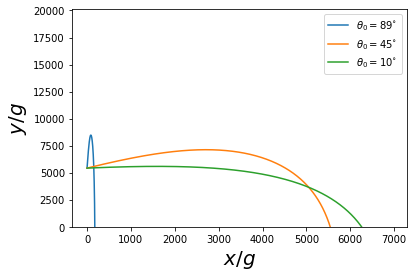

In [2]:
B = 0.00025
V = 120
angle1= 89 *np.pi / 180
angle2= 45 *np.pi / 180
angle3= 10 *np.pi / 180
#initial condition are x position, x velocity, y position (height), y velocity.
initialConditions1=[0,V*np.cos(angle1),5426,V*np.sin(angle1)]
initialConditions2=[0,V*np.cos(angle2),5426,V*np.sin(angle2)]
initialConditions3=[0,V*np.cos(angle3),5426,V*np.sin(angle3)]

#we define simulation time
simTime=[0,37000]
sol1 = solve_ivp(dSdt, simTime, initialConditions1, t_eval=np.linspace(0,3700,10000), args=(B,))
sol2 = solve_ivp(dSdt, simTime, initialConditions2, t_eval=np.linspace(0,3700,10000), args=(B,))
sol3 = solve_ivp(dSdt,simTime, initialConditions3, t_eval=np.linspace(0,3700,10000), args=(B,))
#we plot x y[0] and y y[2]
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=89^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=10^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x/g$', fontsize=20)
plt.ylabel('$y/g$', fontsize=20)
plt.show()

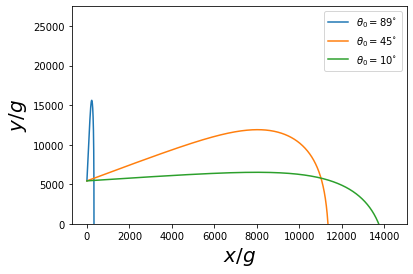

In [3]:
B = 0.00025
V = 800
angle1= 89 *np.pi / 180
angle2= 45 *np.pi / 180
angle3= 10 *np.pi / 180
#initial condition are x position, x velocity, y position (height), y velocity.
initialConditions1=[0,V*np.cos(angle1),5426,V*np.sin(angle1)]
initialConditions2=[0,V*np.cos(angle2),5426,V*np.sin(angle2)]
initialConditions3=[0,V*np.cos(angle3),5426,V*np.sin(angle3)]

#we define simulation time
simTime=[0,37000]
sol1 = solve_ivp(dSdt, simTime, initialConditions1, t_eval=np.linspace(0,3700,10000), args=(B,))
sol2 = solve_ivp(dSdt, simTime, initialConditions2, t_eval=np.linspace(0,3700,10000), args=(B,))
sol3 = solve_ivp(dSdt,simTime, initialConditions3, t_eval=np.linspace(0,3700,10000), args=(B,))
#we plot x y[0] and y y[2]
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=89^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=10^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x/g$', fontsize=20)
plt.ylabel('$y/g$', fontsize=20)
plt.show()

It's possible to observe that in a worst case scenario, the nearest city (Santiago Xalitzintla) is in real danger .